<a href="https://colab.research.google.com/github/MikoFahreza/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Miko Yusrizal Fahreza

NIM: 2141720083

No. Absen: 17

Kelas: TI-3B

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:
𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏
dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


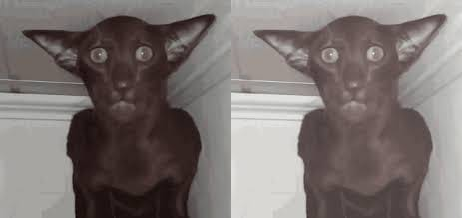

In [8]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/nigcat.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


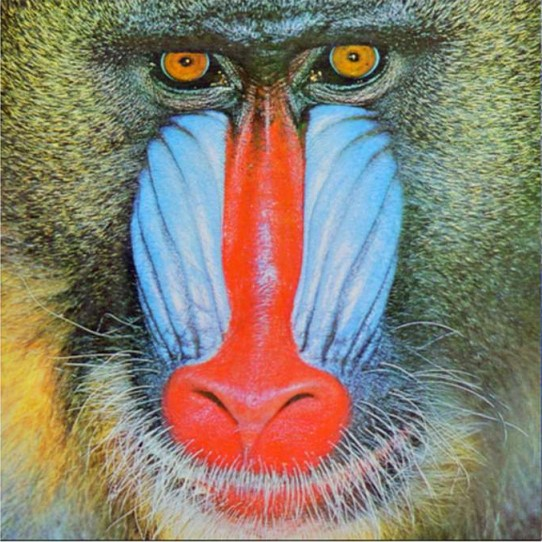

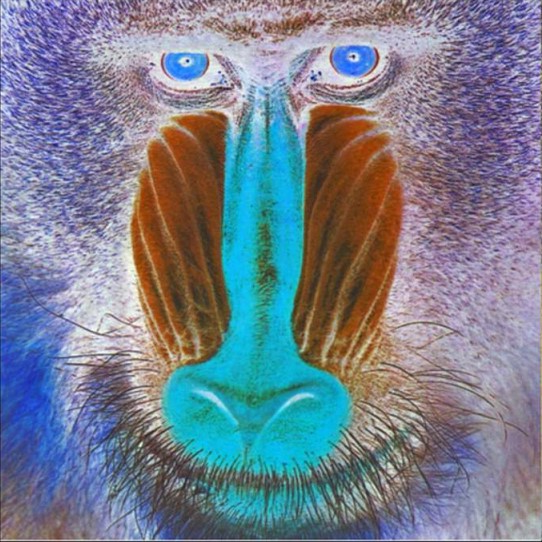

In [12]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

inverted_image = 255 - original

# Menampilkan gambar asli dan gambar inversi
cv2_imshow(original)
cv2_imshow(inverted_image)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


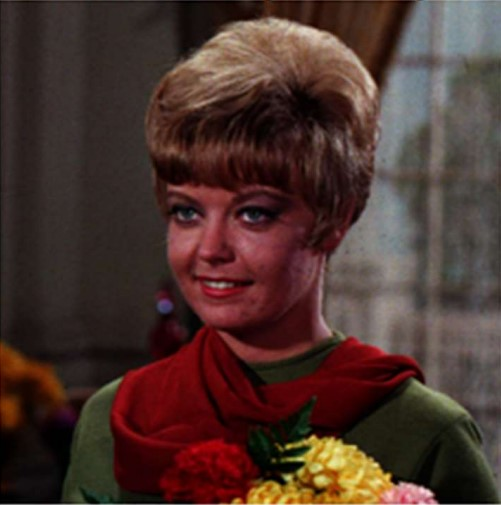

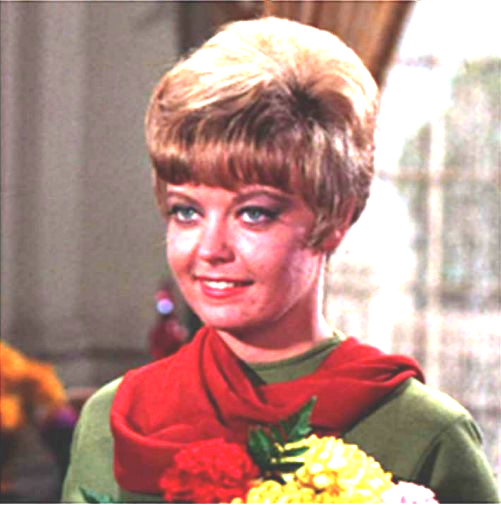

In [20]:
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')

transformed_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Menampilkan gambar asli dan gambar dengan kontras yang ditingkatkan
cv2_imshow(original)
cv2_imshow(transformed_image)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 50


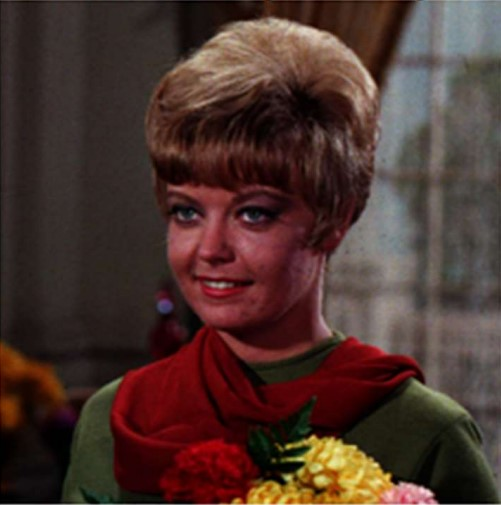

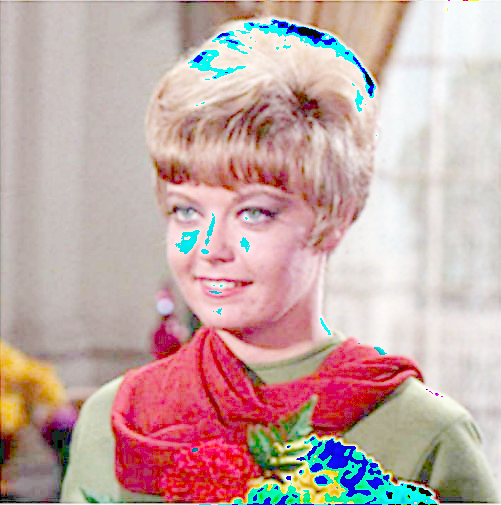

In [22]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')

#gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menentukan faktor transformasi log (0.1 adalah contoh nilai, sesuaikan)
log_transform_factor = brightness

# Melakukan transformasi log pada citra grayscale
log_transformed_image = np.uint8(np.log1p(image) * log_transform_factor)

# Menampilkan gambar asli dan gambar dengan transformasi log
cv2_imshow(image)
cv2_imshow(log_transformed_image)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

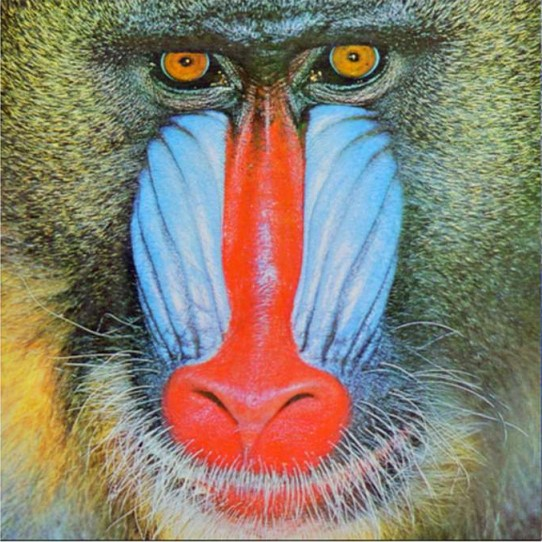

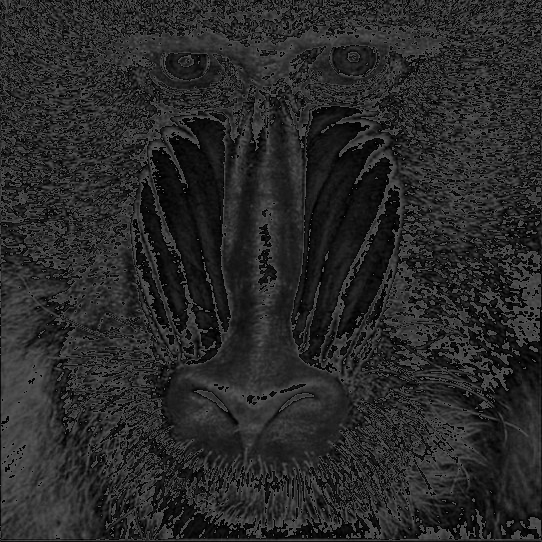

In [23]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

gray_image = np.mean(image, axis=2, dtype=np.uint8)

# Menampilkan citra asli dan citra grayscale
cv2_imshow(image)
cv2_imshow(gray_image)

 b. Lightness

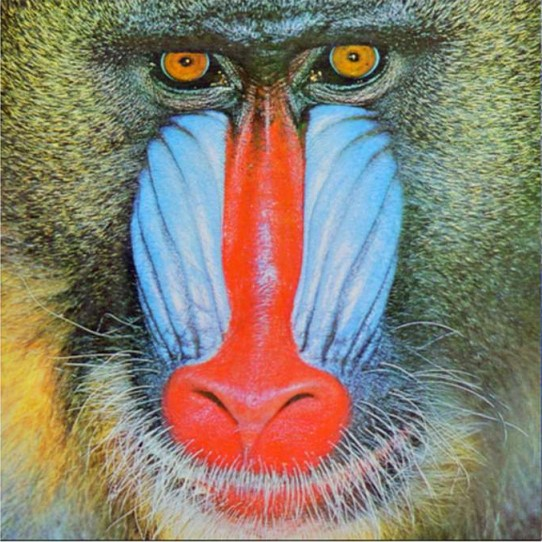

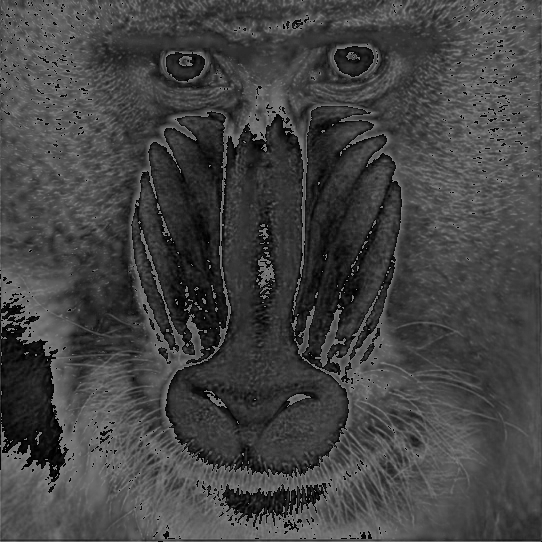

In [24]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

# Mengubah citra menjadi grayscale menggunakan metode Lightness
hls_image = cv.cvtColor(image, cv.COLOR_BGR2HLS)
gray_image = np.uint8((hls_image[:, :, 1] + hls_image[:, :, 2]) / 2)

# Menampilkan citra asli dan citra grayscale
cv2_imshow(image)
cv2_imshow(gray_image)

c. Luminance

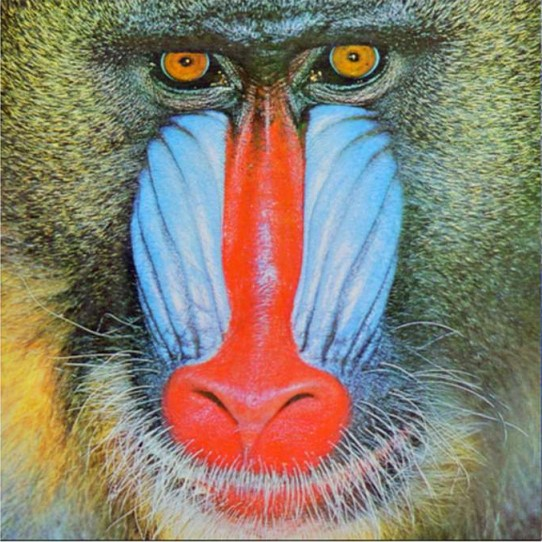

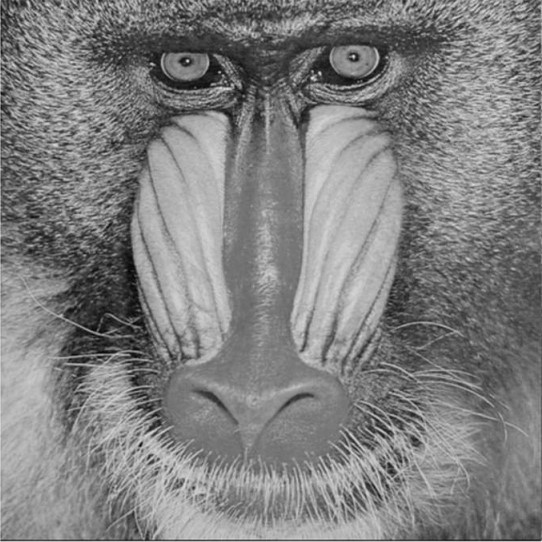

In [25]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

# Mengubah citra menjadi grayscale menggunakan metode Luminance
luminance_image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)[:, :, 0]

# Menampilkan citra asli dan citra grayscale
cv2_imshow(image)
cv2_imshow(luminance_image)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:


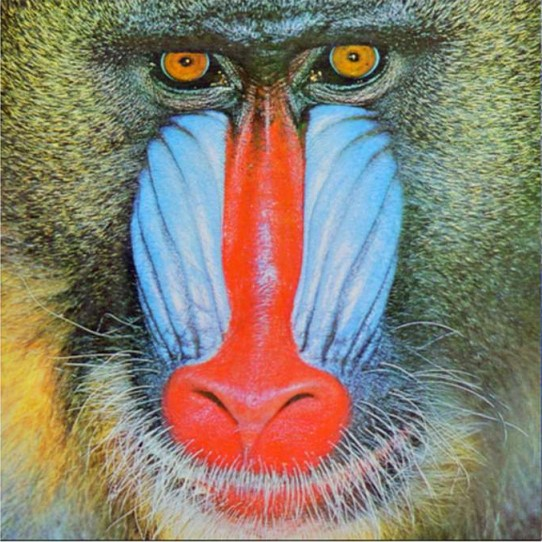

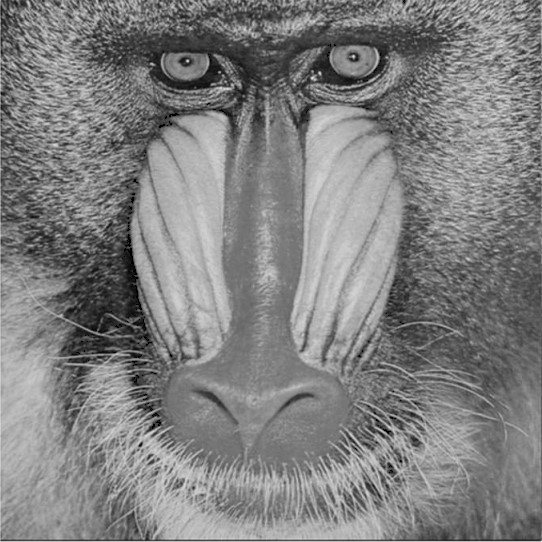

In [33]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

# Definisikan warna yang ingin Anda tampilkan (misal, warna biru)
lower_blue = np.array([50, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 50, 50], dtype=np.uint8)
# lower_blue = np.array([90, 50, 50], dtype=np.uint8)
# upper_blue = np.array([150, 255, 255], dtype=np.uint8)
# Membuat mask untuk warna biru
mask = cv.inRange(image, lower_blue, upper_blue)

# Mengubah warna selain biru menjadi grayscale
result = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
result[mask != 0] = 0

# Menampilkan hasil
cv2_imshow(image)
cv2_imshow(result)